In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

from sklearn import svm
import math

### Task 1: (5+5+5+5+5=25 pts)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 

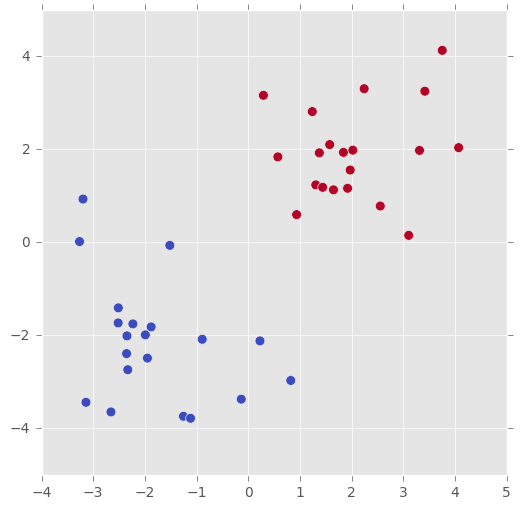

In [84]:
#Data
data1 = pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X = data1.iloc[:,:2]
Y = data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### a. Report the separating hyperplane (line).

We know the plane is of form: $x_{i}^{T}w + b = x_{1}w_{1} + x_{2}w_{2} + b = 0$

In [85]:
lin_clf = svm.SVC(kernel='linear', C=100000)
lin_clf.fit(X, Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
# coeffs
w = lin_clf.coef_[0]
# intercept
b = lin_clf.intercept_[0]

x1 = np.linspace(-5, 5)
# 'y = mx + b' form:
hyper_slope = w[0] / -w[1]
hyper_intercept = b / -w[1]
x2 = hyper_slope*x1 + hyper_intercept

In [87]:
print w, b

[ 0.66329036  0.56359437] 0.0431997442494


Hyperplane: $0.663x_{1} + 0.564x_{2} + 0.0432 = 0$

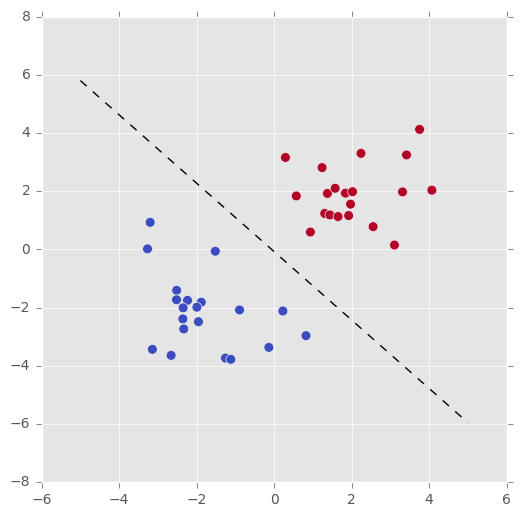

In [88]:
fig, ax = plt.subplots()

X = data1.iloc[:,:2]
Y = data1.iloc[:,2]
ax.plot(x1, x2, 'k--')
ax.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### b. Calculate the upper and lower hyperplanes (lines) of the margin.

In [89]:
lin_clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

We see that two blue supporting vectors lie on one side of the plane, and a single red supporting vectors is on the other side.

In [90]:
# only need one supporting vector from each side
sv_low = lin_clf.support_vectors_[0]
sv_high = lin_clf.support_vectors_[2]

In [91]:
low_intercept = sv_low[1] - hyper_slope*sv_low[0]
high_intercept = sv_high[1] - hyper_slope*sv_high[0]

In [92]:
low_x2 = hyper_slope*x1 + low_intercept
high_x2 = hyper_slope*x1 + high_intercept

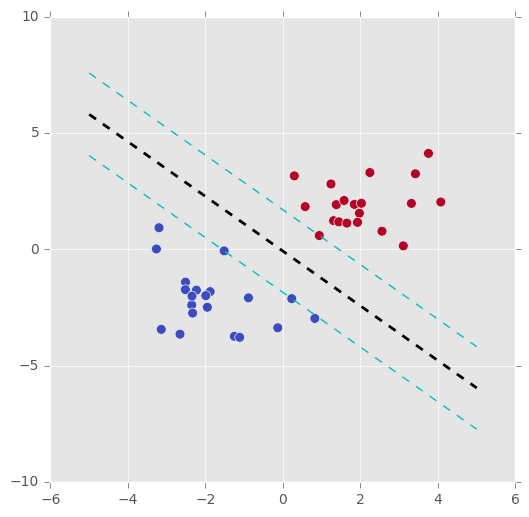

In [93]:
fig, ax = plt.subplots()

X = data1.iloc[:,:2]
Y = data1.iloc[:,2]
ax.plot(x1, x2, 'k--', linewidth=2)
ax.plot(x1, low_x2, 'c--', linewidth=1)
ax.plot(x1, high_x2, 'c--', linewidth=1)
ax.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

Low supporting plane: $0.663x_{1} + 0.564x_{2} + 1.0437 = 0$

High supporting plane: $0.663x_{1} + 0.564x_{2} - 0.957 = 0$

#### c. Compute the width of the margin.

we know that the distance from hyperplane to support vectors is: $M=\frac{1}{||w||}$

In [94]:
M = 1 / np.sqrt(w[0]**2 + w[1]**2)

and the distance from lower support to upper support is 2M:

In [95]:
print 'M:', round(M, 3)
print '2M:', round(2*M, 3)

M: 1.149
2M: 2.298


#### d. List the support vectors.

In [96]:
print 'lower support vectors:\n', lin_clf.support_vectors_[:2]
print 'upper support vectors:\n', lin_clf.support_vectors_[2:]

lower support vectors:
[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]]
upper support vectors:
[[ 0.93564585  0.5969359 ]]


#### e. What would happen to the margin if you instead made the constant C very small?

Theoretically - nothing! Because this is linearly separable, there is no trade-off to consider between slack variables and margin width. The constant C provides a "budget" for slack variables to violate the hyperplane. Because no observations violate our separator, the margin will sit on our existing supporting vectors, regardless of the constant C.

Note: perhaps because of the scikit learn implementation of SVC, we do see that if you set C super super small (~0.00001), then the margins get really big. This doesn't make much sense, and is probably a result of some computation errors...

### Task 2 (5+5+5+5=20 pts)

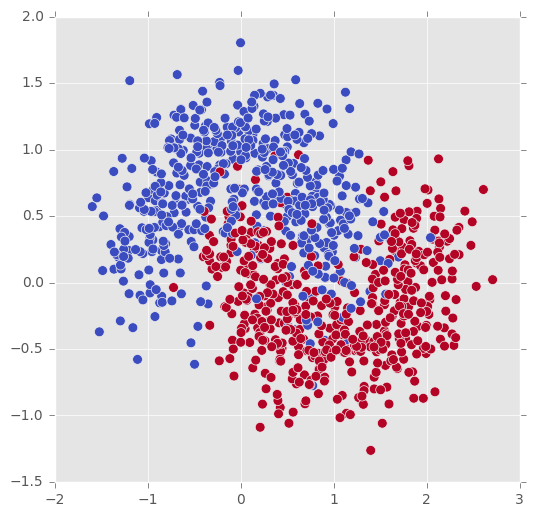

In [125]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and training data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

#### (1) Train polynomial SVM over the training subset of the dataset provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

In [126]:
poly_clf = svm.SVC(kernel='poly') 
poly_clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

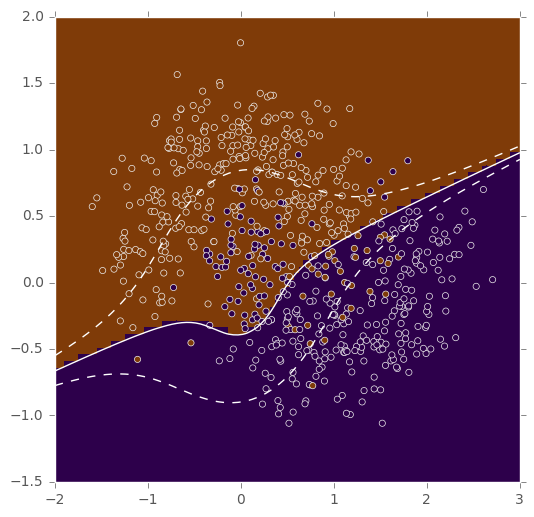

In [127]:
# plot the dataset, colored by TRUE label
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, cmap='PuOr', zorder=2)

# generate a meshgrid across whole 2D domain
XX, YY = np.mgrid[-2:3:100j, -1.5:2:70j]

# compute classifer function for all points in 2D domain, and color according to function output's SIGN
domain_classifer = np.vectorize(lambda x,y: poly_clf.decision_function([[x, y]]))
Z = domain_classifer(XX, YY)
plt.pcolormesh(XX, YY, Z > 0, cmap='PuOr', zorder=1)

# add contour line at hyperplane, and contour lines to approximate support vector planes at f(x,y) = -1, 1 
plt.contour(XX, YY, Z, colors=['w', 'w', 'w'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

In [128]:
print 'IS (training) accuracy:', round(poly_clf.score(X_train, Y_train), 3)
print 'OS (test) accuracy:', round(poly_clf.score(X_test, Y_test), 3)

IS (training) accuracy: 0.813
OS (test) accuracy: 0.827


#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

#### (a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set.

In [129]:
# set up a dictionary with accuracy vs. log(C) at each degree
perf = {1:[], 2:[], 3:[], 4:[]}

for degree in [1,2,3,4]:
    for C in [math.exp(i) for i in np.linspace(-10,2*degree,200)]:
        # fit the model on the training data
        poly_clf = svm.SVC(kernel='poly', C=C, degree=degree) 
        poly_clf.fit(X_train_1, Y_train_1)
        # compute accuracy with validation data
        perf[degree].append([poly_clf.score(X_vali, Y_vali), np.log(C)])
        
for deg in perf.keys():
    perf[deg] = np.asarray(perf[deg])

#### (b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

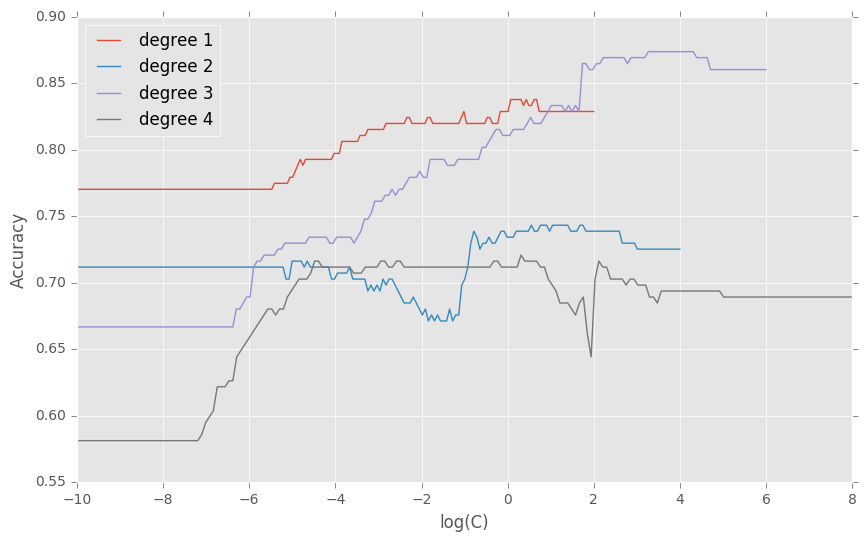

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot log(C) vs. validation accuracy
for deg in perf.keys():
    ax.plot(perf[deg][:, 1], perf[deg][:, 0], '-', label='degree {}'.format(deg))

ax.set_xlabel('log(C)')
ax.set_ylabel('Accuracy')
ax.legend(loc=0)

In [108]:
max(perf[3][:,0])

0.87387387387387383

For maximum accuracy, we'll select degree 3 and log(C)= 3.25 --> C = np.exp(3.25) ~ 26.

#### (c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 

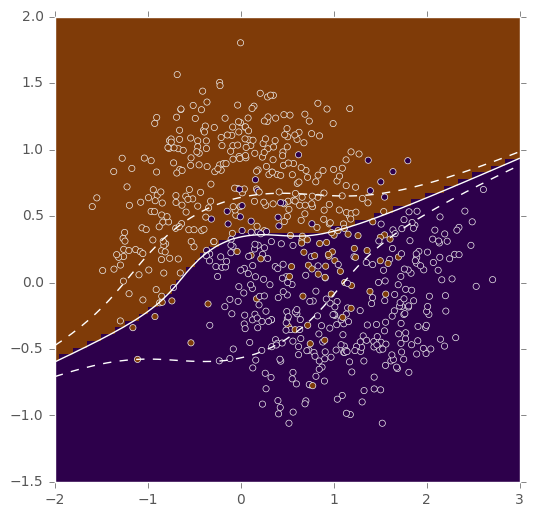

In [135]:
poly_clf = svm.SVC(kernel='poly', C=26, degree=3) 
# let's use original 'full' training set to fit
poly_clf.fit(X_train, Y_train)

# plot the dataset, colored by TRUE label
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, cmap='PuOr', zorder=2)

# generate a meshgrid across whole 2D domain
XX, YY = np.mgrid[-2:3:100j, -1.5:2:70j]

# compute classifer function for all points in 2D domain, and color according to function output's SIGN
domain_classifer = np.vectorize(lambda x,y: poly_clf.decision_function([[x, y]]))
Z = domain_classifer(XX, YY)
plt.pcolormesh(XX, YY, Z > 0, cmap='PuOr', zorder=1)

# add contour line at hyperlane, and contour lines to approximate support vector planes at f(x,y) = -1, 1 
plt.contour(XX, YY, Z, colors=['w', 'w', 'w'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

In [136]:
print 'IS (training) accuracy:', round(poly_clf.score(X_train, Y_train), 3)
print 'OS (test) accuracy:', round(poly_clf.score(X_test, Y_test), 3)

IS (training) accuracy: 0.861
OS (test) accuracy: 0.891


### Task 3 (5+5=10pts)

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports(1) or SUV(2)), the color of the car (red(1) or yellow(2)), and the origin of the car (domestic(1) or imported(2)). And the labels for the data are: stolen(1) and not(0). 

Please perform all the necessary computations "by hands" rather than using python code.

In [111]:
import numpy as np
import pandas as pd
y=[1,0,1,0,1,0,1,0,0,1]
X=[[1,1,1,2,2,2,2,2,1,1],[1,1,1,1,1,2,2,2,2,1],[1,1,1,1,2,2,2,1,2,2]]
data=[y]+X
data=pd.DataFrame(data).T
data.columns=['Stolen?','Color','Type','Origin']

In [113]:
data.sort_values('Stolen?')

,Stolen?,Color,Type,Origin
1,0,1,1,1
3,0,2,1,1
5,0,2,2,2
7,0,2,2,1
8,0,1,2,2
0,1,1,1,1
2,1,1,1,1
4,1,2,1,2
6,1,2,2,2
9,1,1,1,2


#### a) Calculate the following sample probabilities:
#### P(Red|Stolen), P(SUV|Stolen), P(Domestic|Stolen), P(Red|Not Stolen) , P(SUV|Not Stolen), and P(Domestic|Not Stolen)

P(Red|Stolen) = 3/5

P(SUV|Stolen) = 1/5

P(Domestic|Stolen) = 2/5

P(Red|Not Stolen) = 2/5

P(SUV|Not Stolen) = 3/5

P(Domestic|Not Stolen) = 3/5

P(Stolen) = P(Not Stolen) = 1/2

#### b) Suggest a classification for a red, domestic SUV - whether it will be stolen or not - using Naive Bayes classifier. 

$P(Stolen | red,dom,SUV) = \frac{P(red,dom,SUV | Stolen)P(Stolen)}{\sum_{C}P(red,dom,SUV | C)P(C)} = \frac{P(red|Stolen)P(dom|Stolen)P(SUV|Stolen)P(Stolen)}{\sum_{C}P(red,dom,SUV | C)P(C)}$

$P(red|Stolen)P(dom|Stolen)P(SUV|Stolen)P(Stolen) = (3/5)(2/5)(1/5)(1/2) = 0.024$

$P(red|Not Stolen)P(dom|Not Stolen)P(SUV|Not Stolen)P(Not Stolen) = (2/5)(3/5)(3/5)(1/2) = 0.072$

0.024 + 0.072 = 0.096 (normalization factor)

P(Stolen | red,dom,SUV) = 0.024 / 0.096 = 0.25

P(Not Stolen | red,dom,SUV) = 0.072 / 0.096 = 0.75

Because 0.75 > 0.25, I'd predict that this vehicle will NOT be stolen...

### Task 4 (10+10=20pts)
Consider a following Guassian Naive Bayes problem.
We use eight factors to predict if people have diabetes or not. The variabls are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

In [114]:
data_train = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_train.csv") 
y_train = data_train.iloc[:,1] 
X_train = data_train.iloc[:,2:] 

data_test = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_test.csv")
y_test = data_test.iloc[:,1]
X_test = data_test.iloc[:,2:]

In [115]:
X_train.head()

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


## a)Train the classifier: use the training data to estimate prior probabilities $P(y=b)$ as well as the parameters (mean and standard deviation) of the sample distributions $P(x_i|y=b)$.

In [14]:
# using the sklearn Gaussian NB package for this simple problem
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [21]:
# report priors
print 'Prior for "No Diabetes": {}'.format(round(gnb.class_prior_[0], 4))
print 'Prior for "Diabetes": {}'.format(round(gnb.class_prior_[1], 4))

Prior for "No Diabetes": 0.6992
Prior for "Diabetes": 0.3008


In [117]:
# report sample gaussian parameters for class-conditional models
print '"No Diabetes" class - feature sample MEANS:'
for feature in zip(X_train.columns, gnb.theta_[0]):
    print '{}: {}'.format(feature[0], round(feature[1], 2))
print '\n'
print '"No Diabetes" class - feature sample STD DEV:'
for feature in zip(X_train.columns, gnb.sigma_[0]):
    print '{}: {}'.format(feature[0], round(np.sqrt(feature[1]), 2))
print '\n'
print '"Diabetes" class - feature sample MEANS:'
for feature in zip(X_train.columns, gnb.theta_[1]):
    print '{}: {}'.format(feature[0], round(feature[1], 2))
print '\n'
print '"Diabetes" class - feature sample STD DEV:'
for feature in zip(X_train.columns, gnb.sigma_[1]):
    print '{}: {}'.format(feature[0], round(np.sqrt(feature[1]), 2))

"No Diabetes" class - feature sample MEANS:
t_pre: 2.69
glu: 111.47
blood_p: 69.21
triceps: 27.2
serum: 127.01
b_m: 31.71
pedigree_f: 0.47
age: 28.39


"No Diabetes" class - feature sample STD DEV:
t_pre: 2.6
glu: 24.62
blood_p: 11.68
triceps: 10.41
serum: 91.21
b_m: 6.32
pedigree_f: 0.29
age: 8.51


"Diabetes" class - feature sample MEANS:
t_pre: 4.07
glu: 144.14
blood_p: 74.56
triceps: 33.48
serum: 209.21
b_m: 35.22
pedigree_f: 0.64
age: 35.79


"Diabetes" class - feature sample STD DEV:
t_pre: 3.49
glu: 30.41
blood_p: 13.7
triceps: 9.69
serum: 126.02
b_m: 6.21
pedigree_f: 0.44
age: 10.19


#### b)Perform the classification for the test sample and compare your result to y_test and report the OS classification accuracy.

In [45]:
# OS accuracy of Gaussian NB classifier
y_pred = gnb.predict(X_test)
accuracy = round(1.0*sum(y_pred==y_test) / len(y_pred), 3)
print 'Prediction accuracy over test set (OS): {}'.format(accuracy)

Prediction accuracy over test set (OS): 0.791


### Task 5 (10+15=25 pts)
We have an artificial data set split, while the training set contains both - labeled (Label_train) and unlabeled (Unlabel) data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [118]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_train.csv")
y_Label_train=data_train.iloc[:,1] 
X_Label_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_test.csv")
y_Label_test=data_test.iloc[:,1]
X_Label_test=data_test.iloc[:,2:]

data_Unlabel=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_Unlabel.csv")
X_Unlabel=data_Unlabel.iloc[:,1:]

#### a) Use the labeled part data_train to predict the labels of X_Label_test, and report the classification accuracy.

In [120]:
# CREDIT TO LINGJING FOR IMPLEMENTING THE DISCRETE NB CLASSIFIER
def trainNaiveBayesDiscrete(trainData):
  #training discrete Naive Bayes Classifier
  tY=trainData.loc[:,trainData.columns[0]]
  m=max([trainData[j][i] for j in trainData.columns[1:] for i in trainData.index]) #maximal number of levels in each feature of a training set
    # m is highest number of discrete levels among all features
    
#create output data structure for the probabilities - same column labels, rows correspond to values of x and there are two arrays like that for 
  #different b
  dp=[pd.DataFrame(columns=trainData.columns, index=range(1,m+1)), pd.DataFrame(columns=trainData.columns, index=range(1,m+1))]
  #split the training data between two labels
  ind1=tY==0
  ind2=tY==1
  #estimate P(y=b)  
  dp[0][trainData.columns[0]][1]=1.0*ind1.sum()/len(trainData.index)
  dp[1][trainData.columns[0]][1]=1.0*ind2.sum()/len(trainData.index)
  #estimate conditional probabilities P(x|y=b)
  for j in trainData.columns[1:]: # for each feature
    for i in range(1,m+1): # for each level within feature
        dp[0].loc[i,j]=1.0*(trainData[j][ind1]==i).sum()/ind1.sum();
        dp[1].loc[i,j]=1.0*(trainData[j][ind2]==i).sum()/ind2.sum();
  return dp

In [121]:
# CREDIT TO LINGJING FOR IMPLEMENTING THE DISCRETE NB CLASSIFIER!
def classifyNaiveBayesDiscrete(classData,dp):
  #classifying using trained discrete Naive Bayes Classifier

    # make an empty predicted label array
  Y=classData[classData.columns[0]]*0
  for i in classData.index: #for each record to classify
    #start with the priors
    Prior1=dp[0][classData.columns[0]][1]; 
    Prior2=dp[1][classData.columns[0]][1];
    #and multiply them by the corresponding conditional probabilities P(x_i|y=b)
    for j in classData.columns[1:]:
      Prior1=Prior1*dp[0][j][classData[j][i]]
      Prior2=Prior2*dp[1][j][classData[j][i]]
    # note that we don't need to NORMALIZE these posteriors, because normalization
    # just means dividing all posteriors by the same number
    # for comparing posterior size (classification), there's no point
    Y[i]=int(Prior2>Prior1) #finally for each record decide which P(y|x) is higher and choose the label
  return Y

In [122]:
# y-label column needs to be in position 0 on training set
dp = trainNaiveBayesDiscrete(pd.concat([y_Label_train, X_Label_train], axis=1))

# predict labels using only the labelled test set
y_pred = classifyNaiveBayesDiscrete(pd.concat([y_Label_test, X_Label_test], axis=1), dp)

accuracy = round(1.0*sum(y_pred==y_Label_test) / len(y_pred), 3)
print 'Prediction accuracy over test set (OS): {}'.format(accuracy)

Prediction accuracy over test set (OS): 0.639


#### b) Improve the classification by using the unlabeled data data_Unlabel and the EM algorithm to predict labels of X_Label_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use any packages you prefer). 

In [78]:
# CREDIT TO LINGJING FOR IMPLEMENTING EM ALGORITHM!
#implementation of Expectation-Maximization algorithm for partially labeled data
import math
def EM(X_Label,y_Label,X_Unlabel,dp):
  t = 0  
  haslabels=len(y_Label)>0

  while True:
    t = t + 1

    classData=X_Unlabel
    # Now we want to calculate P(y=1|x) and P(y=2|x) for all observations xj. (these are bunch of scalars)
    # we need this to calculate new dp. Basically speaking, for every new iteration we need a new dp.

    #for y=1 and y=2

    p_x_1=[] #unnormalized P(y=1|x)
    p_x_2=[] #unnormalized P(y=2|x)
    cols=dp[0].columns

    for i in classData.index:
        P1=dp[0][cols[0]][1];
        P2=dp[1][cols[0]][1];
        for j in classData.columns:
            P1=P1*dp[0][j][classData[j][i]]
            P2=P2*dp[1][j][classData[j][i]]
        p_x_1.append(P1)
        p_x_2.append(P2)
    
 
    #Rescale p_x_1 and p_x_2:
    summ=np.asarray(p_x_1)+np.asarray(p_x_2)
    p_x_1_s=np.asarray(p_x_1)/summ
    p_x_2_s=np.asarray(p_x_2)/summ
    inds_1 = np.where(np.isnan(p_x_1_s))
    inds_2 = np.where(np.isnan(p_x_2_s))
    p_x_1_s[inds_1]=0.5
    p_x_2_s[inds_2]=0.5
    #Now let's calculate P(y=1) and P(y=2)
    p_1=p_x_1_s.sum()/len(p_x_1_s)
    p_2=p_x_2_s.sum()/len(p_x_2_s)


    #Now let's calculate the probability distribution of P(xi|y=1) and P(xi|y=2)
    
    m=max([classData[j][i] for j in classData.columns for i in classData.index]) #maximal number of classes in each feature of a training set

    #create output data structure for the probabilities - new iteration
    
    dp1=[pd.DataFrame(columns=cols, index=range(1,m+1)), pd.DataFrame(columns=cols, index=range(1,m+1))]

    #P(y=b)  
    dp1[0][cols[0]][1]=p_1
    dp1[1][cols[0]][1]=p_2


    #estimate conditional probabilities P(x|y=b) -do we add labeled data to fit?

    temp=np.concatenate((np.asmatrix(X_Unlabel),np.asarray(pd.DataFrame(p_x_1_s)),np.asarray(pd.DataFrame(p_x_2_s))),
                        axis=1)
    temp=pd.DataFrame(temp)
    if haslabels:
        temp_l=np.concatenate((np.asmatrix(X_Label),np.asmatrix(1*(y_Label==0)).transpose(),np.asmatrix(1*(y_Label==1)).transpose()),axis=1)
        temp_l=pd.DataFrame(temp_l)
        pd.concat([temp,temp_l])
   

    for j in range(1,len(dp[0].T)):
        for i in range(len(dp[0])):

            dp1[0].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-2].sum()/temp.iloc[:,-2].sum()
            dp1[1].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-1].sum()/temp.iloc[:,-1].sum()
 
        ############################################################################################
    # Now we use dp to decide whether to continue our iterations
    if (((dp1[0]-dp[0])**2).sum()).sum()+(((dp1[1]-dp[1])**2).sum()).sum()<0.001: #if dp does not change much
        break
    else: 
        dp=dp1  #save new dp and perform next iteration

        
    ###############################################################################################
        #Calculate the log-likelihood
        
        L=0
        
        for i in classData.index:
            P1=dp[0][cols[0]][1];
            P2=dp[1][cols[0]][1];
            for j in classData.columns:
                P1=P1*dp[0][j][classData[j][i]]
                P2=P2*dp[1][j][classData[j][i]]
            temp=math.log(P1+P2)
            L=L+temp
        if haslabels:    
          for i in X_Label.index:
            yi=y_Label[i]
            P=dp[yi][cols[0]][1];
            for j in X_Label.columns:
                P=P*dp[yi][j][X_Label[j][i]]
            L=L+math.log(P)
        
        print "Iteration {0}: log maximum liklihood = {1}".format(t,L)    
    
  return dp

In [124]:
# use EM algorithm until convergence
dpEM = EM(X_Label_train, y_Label_train, X_Unlabel, dp)

# using the newEM-optimized feature models, 
# predict y-labels with the simple discrete NB classifier
y_pred = classifyNaiveBayesDiscrete(pd.concat([y_Label_test, X_Label_test], axis=1), dpEM)

accuracy = round(1.0*sum(y_pred==y_Label_test) / len(y_pred), 3)
print '\nPrediction accuracy over test set (OS): {}'.format(accuracy)

/Users/ian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide
/Users/ian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


Iteration 1: log maximum liklihood = -590.452072842
Iteration 2: log maximum liklihood = -572.346722303
Iteration 3: log maximum liklihood = -559.190769042
Iteration 4: log maximum liklihood = -556.633109435
Iteration 5: log maximum liklihood = -556.067798435

Prediction accuracy over test set (OS): 0.944
